# How to make spatial joins

In [1]:
import nes
import geopandas as gpd
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from copy import copy

%matplotlib inline

In [2]:
countries_path = '/gpfs/projects/bsc32/models/NES_tutorial_data/gadm_country_mask/gadm_country_ISO3166.shp'
countries = gpd.read_file(countries_path)

## 1. Read/Create grid

In [3]:
# Rotated grid from MONARCH
projection='rotated'
centre_lat = 51
centre_lon = 10
west_boundary = -35
south_boundary = -27
inc_rlat = 2.
inc_rlon = 2.

nessy = nes.create_nes(comm=None, info=False, projection=projection,
                       centre_lat=centre_lat, centre_lon=centre_lon,
                       west_boundary=west_boundary, south_boundary=south_boundary,
                       inc_rlat=inc_rlat, inc_rlon=inc_rlon)

In [4]:
shp = nessy.create_shapefile()

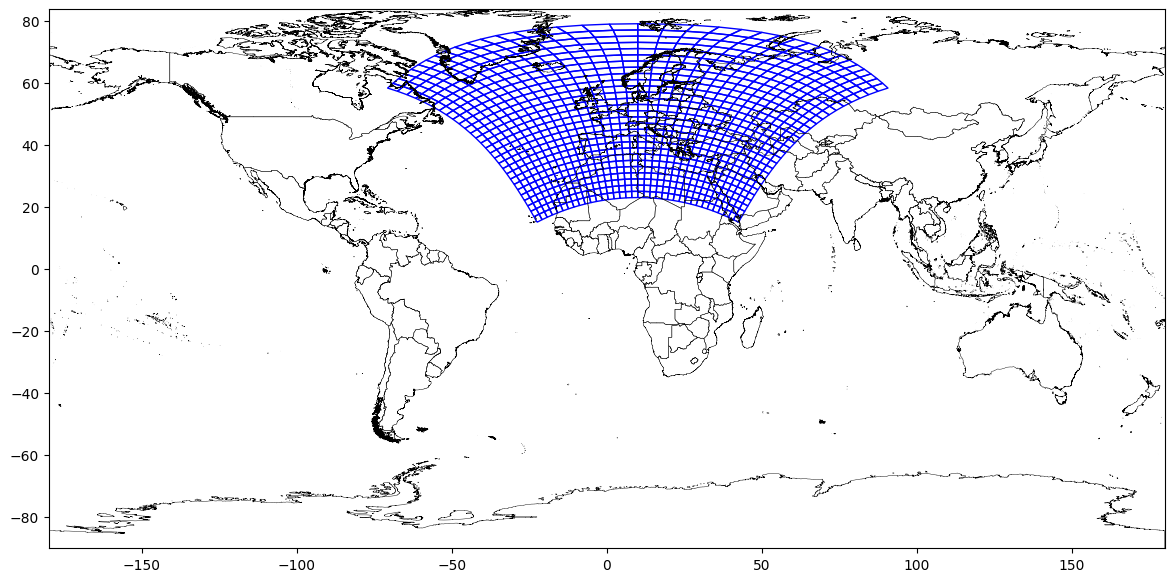

In [5]:
fig, ax = plt.subplots(1, figsize=(19, 7))
shp.plot(ax=ax, facecolor="none", edgecolor="blue")
countries.plot(ax=ax, facecolor="none", edgecolor='black', linewidth=0.3)

ax.margins(0)

## 2. Spatial join

### 2.1. Centroid

/scratch/tmp/9400020/ipykernel_2995633/2099596389.py:4: UserWarning: Geometry is in a geographic CRS. Results from 'centroid' are likely incorrect. Use 'GeoSeries.to_crs()' to re-project geometries to a projected CRS before this operation.

  centroid_shp['geometry'] = centroid_shp['geometry'].centroid


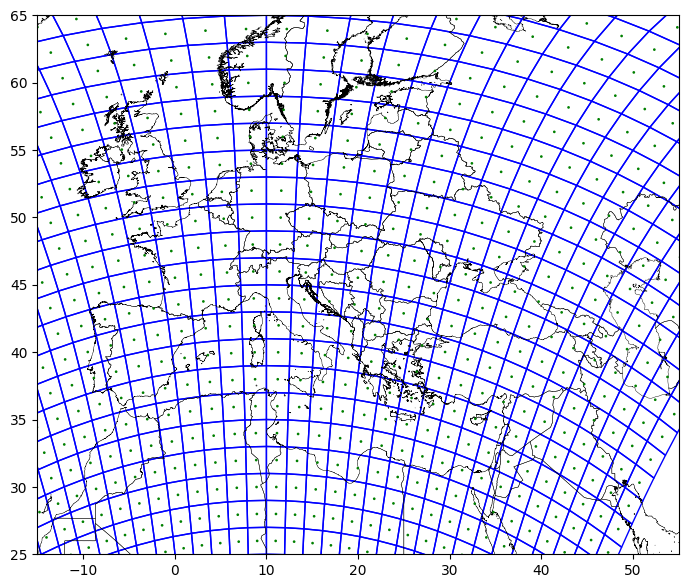

In [6]:
# Plot

centroid_shp = copy(nessy.shapefile)
centroid_shp['geometry'] = centroid_shp['geometry'].centroid

fig, ax = plt.subplots(1, figsize=(19, 7))
shp.plot(ax=ax, facecolor="none", edgecolor="blue")
countries.plot(ax=ax, facecolor="none", edgecolor='black', linewidth=0.3)

centroid_shp.plot(ax=ax, edgecolor='none', facecolor="green", marker=".", markersize=15)

ax.margins(0)

zoom={'x_min': -15, 'x_max': 55, 'y_min': 25, 'y_max':65}
plt.axis([zoom['x_min'], zoom['x_max'], zoom['y_min'], zoom['y_max']])

plt.show()

In [7]:
%time nessy.spatial_join(countries_path, method='centroid', var_list='ISO')

CPU times: user 2.24 s, sys: 128 ms, total: 2.37 s
Wall time: 2.57 s


In [ ]:
# Plot results

fig, ax = plt.subplots(1, figsize=(19, 7))

nessy.shapefile.plot(ax=ax, column='ISO', cmap='gist_rainbow', legend=True, 
                     legend_kwds={'ncol': 3, 'loc': 'center left'})

countries.plot(ax=ax, facecolor="none", edgecolor='black', linewidth=0.3)
shp.plot(ax=ax, facecolor="none", edgecolor="grey", linewidth=0.3)
centroid_shp.plot(ax=ax, edgecolor='none', facecolor="green", marker=".", markersize=15)

leg = ax.get_legend()
leg.set_bbox_to_anchor((1., 0.5))

ax.margins(0)

zoom={'x_min': -15, 'x_max': 55, 'y_min': 25, 'y_max':65}
plt.axis([zoom['x_min'], zoom['x_max'], zoom['y_min'], zoom['y_max']])

plt.show()

### 2.2. Intersection

In [ ]:
nessy = nes.create_nes(comm=None, info=False, projection=projection,
                       centre_lat=centre_lat, centre_lon=centre_lon,
                       west_boundary=west_boundary, south_boundary=south_boundary,
                       inc_rlat=inc_rlat, inc_rlon=inc_rlon)

%time nessy.spatial_join(countries_path, method='intersection', var_list='ISO')

In [ ]:
# Plot results

fig, ax = plt.subplots(1, figsize=(19, 7))

nessy.shapefile.plot(ax=ax, column='ISO', cmap='gist_rainbow', legend=True, 
                     legend_kwds={'ncol': 3, 'loc': 'center left'})

countries.plot(ax=ax, facecolor="none", edgecolor='black', linewidth=0.3)
shp.plot(ax=ax, facecolor="none", edgecolor="grey", linewidth=0.3)

leg = ax.get_legend()
leg.set_bbox_to_anchor((1., 0.5))

ax.margins(0)

zoom={'x_min': -15, 'x_max': 55, 'y_min': 25, 'y_max':65}
plt.axis([zoom['x_min'], zoom['x_max'], zoom['y_min'], zoom['y_max']])

plt.show()

### 2.3. Nearest

In [ ]:
nessy = nes.create_nes(comm=None, info=False, projection=projection,
                       centre_lat=centre_lat, centre_lon=centre_lon,
                       west_boundary=west_boundary, south_boundary=south_boundary,
                       inc_rlat=inc_rlat, inc_rlon=inc_rlon)

%time nessy.spatial_join(countries_path, method='nearest', var_list='ISO')

In [ ]:
# Plot results

fig, ax = plt.subplots(1, figsize=(19, 7))

nessy.shapefile.plot(ax=ax, column='ISO', cmap='gist_rainbow', legend=True, 
                     legend_kwds={'ncol': 3, 'loc': 'center left'})

countries.plot(ax=ax, facecolor="none", edgecolor='black', linewidth=0.3)
shp.plot(ax=ax, facecolor="none", edgecolor="grey", linewidth=0.3)

leg = ax.get_legend()
leg.set_bbox_to_anchor((1., 0.5))

ax.margins(0)

zoom={'x_min': -15, 'x_max': 55, 'y_min': 25, 'y_max':65}
plt.axis([zoom['x_min'], zoom['x_max'], zoom['y_min'], zoom['y_max']])

plt.show()

## 3. Write string data as NetCDF

In [ ]:
nessy.variables['ISO'] = {'data': nessy.shapefile['ISO'].values.reshape([1, 1, nessy.lat['data'].shape[0], nessy.lon['data'].shape[-1]]),
                          'dtype': str,
                         }

In [ ]:
# Set the string lenght
nessy.set_strlen(3)

In [ ]:
nessy.to_netcdf('spatial_join.nc')